# Data Ingestion

In [34]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("./data/churnTrain.csv")
df_test = pd.read_csv("./data/churnTest.csv")

In [3]:
pd.__version__

'0.23.4'

## Data Exploration

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State                  3333 non-null object
Account_Length         3333 non-null int64
Area_Code              3333 non-null int64
Phone_No               3333 non-null int64
International_Plan     3333 non-null object
Voice_Mail_Plan        3333 non-null object
No_Vmail_Messages      3333 non-null int64
Total_Day_minutes      3333 non-null float64
Total_Day_Calls        3333 non-null int64
Total_Day_charge       3333 non-null float64
Total_Eve_Minutes      3333 non-null float64
Total_Eve_Calls        3333 non-null int64
Total_Eve_Charge       3333 non-null float64
Total_Night_Minutes    3333 non-null float64
Total_Night_Calls      3333 non-null int64
Total_Night_Charge     3333 non-null float64
Total_Intl_Minutes     3333 non-null float64
Total_Intl_Calls       3333 non-null int64
Total_Intl_Charge      3333 non-null float64
No_CS_Calls            3333 non-null int64
Churn         

In [6]:
df_train.head(5)

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


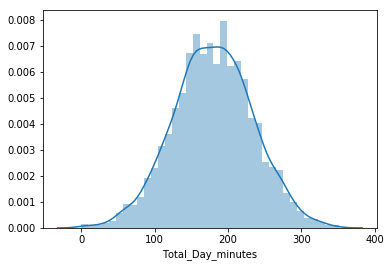

In [7]:
sns.distplot(df_train['Total_Day_minutes'])

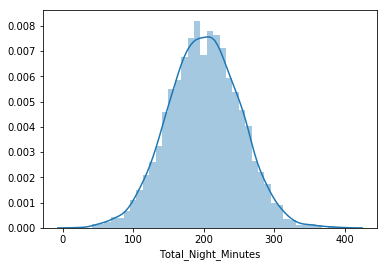

In [8]:
sns.distplot(df_train['Total_Night_Minutes'])

## Encode binary categorical columns to bool

In [9]:
di = {" yes": True, " no": False}

In [10]:
df_train.replace({"International_Plan": di}, inplace=True)

In [11]:
df_train.replace({"Voice_Mail_Plan": di}, inplace=True)

In [12]:
df_train.head(5)

,State,Account_Length,Area_Code,Phone_No,International_Plan,Voice_Mail_Plan,No_Vmail_Messages,Total_Day_minutes,Total_Day_Calls,Total_Day_charge,...,Total_Eve_Calls,Total_Eve_Charge,Total_Night_Minutes,Total_Night_Calls,Total_Night_Charge,Total_Intl_Minutes,Total_Intl_Calls,Total_Intl_Charge,No_CS_Calls,Churn
0,KS,128,415,3824657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,3717191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,3581921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,3759999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,3306626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df_train["International_Plan"].unique()

array([False,  True])

In [14]:
df_train['International_Plan'].value_counts()

False    3010
True      323
Name: International_Plan, dtype: int64

In [15]:
df_train['Voice_Mail_Plan'].value_counts()

False    2411
True      922
Name: Voice_Mail_Plan, dtype: int64

## Missing Values

It turned out that there are no missing values in the dataframe.

In [16]:
 len(df_train.index)-df_train.count()

State                  0
Account_Length         0
Area_Code              0
Phone_No               0
International_Plan     0
Voice_Mail_Plan        0
No_Vmail_Messages      0
Total_Day_minutes      0
Total_Day_Calls        0
Total_Day_charge       0
Total_Eve_Minutes      0
Total_Eve_Calls        0
Total_Eve_Charge       0
Total_Night_Minutes    0
Total_Night_Calls      0
Total_Night_Charge     0
Total_Intl_Minutes     0
Total_Intl_Calls       0
Total_Intl_Charge      0
No_CS_Calls            0
Churn                  0
dtype: int64

## Feature Selection, Feature Engineering 

- We eliminated the column 'Phone_No', since similar to "ID", it's unique for each sample and doesn't provide any information for training. 

- We also eliminated the 'State' column, which is correlates to 'Area_Code'

In [17]:
df_train.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone_No',
       'International_Plan', 'Voice_Mail_Plan', 'No_Vmail_Messages',
       'Total_Day_minutes', 'Total_Day_Calls', 'Total_Day_charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'No_CS_Calls', 'Churn'],
      dtype='object')

In [18]:
predictors = ['Account_Length', 'Area_Code', 
       'International_Plan', 'Voice_Mail_Plan', 'No_Vmail_Messages',
       'Total_Day_minutes', 'Total_Day_Calls', 'Total_Day_charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'No_CS_Calls']

In [19]:
target = 'Churn'

In [20]:
X = df_train[predictors].values
y = df_train[target].values

In [21]:
y = np.squeeze(y)

## Build the model

In [35]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, f1_score 

### XGBoost

XGBoost is a type of Gradient Booosting Modeling that is highly efficient, flexible and portable. It has been the winning algorithms in many Kagglg, KDDCup compititions and the Netflix challenge. 

In [22]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[2840   10]
 [  94  389]]


In [23]:
?xgb.XGBClassifier

In [46]:
y_pred_proba_xgboost = xgb_model.predict_proba(X)

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=123)
random_forest_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [57]:
y_pred_proba_rf = random_forest_model.predict_proba(X)

In [58]:
y_pred_proba_rf

array([[0.69596974, 0.30403026],
       [0.89691794, 0.10308206],
       [0.87884536, 0.12115464],
       ...,
       [0.87522668, 0.12477332],
       [0.81918672, 0.18081328],
       [0.85822112, 0.14177888]])

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [59]:
logistic_regression_model = LogisticRegression(random_state=123, solver='newton-cg')
logistic_regression_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred_proba_lr = logistic_regression_model.predict_proba(X)

In [61]:
y_pred_proba_lr

array([[0.89358476, 0.10641524],
       [0.95541374, 0.04458626],
       [0.93762257, 0.06237743],
       ...,
       [0.79084132, 0.20915868],
       [0.7338228 , 0.2661772 ],
       [0.91567193, 0.08432807]])

## Model Comparison

We will compare the 3 models (XGBoost, Random Forest and Logistic Regression) by obeserving metrics from **ROC** (*Receiver Operating Characteristic*) curve and **PR** (*Precision Recall*) curve

In [62]:
pred_probas = {'xgboost': y_pred_proba_xgboost, 
              'random_forest': y_pred_proba_rf,
              'logistic_regression': y_pred_proba_lr}

### ROC Curve

In [66]:
fpr, tpr, thresholds = [],[],[]
area_under_curve = []
my_models = []
for key in pred_probas:
    f,t,th = roc_curve(y, pred_probas[key][:,1], pos_label=True)
    my_models.append(key)
    area_under_curve.append(auc(f, t))
    fpr.append(f)
    tpr.append(t)
    thresholds.append(th)

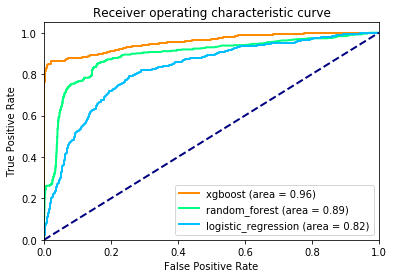

In [71]:
colors = ['darkorange', 'springgreen', 'deepskyblue']
lw = 2
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             lw=lw, label= my_models[i] + ' (area = %0.2f)' %area_under_curve[i])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")

### Precision-Recall Curve

In [72]:
precision, recall, thresholds = precision_recall_curve(y, pred_probas['xgboost'][:,1], pos_label=True)

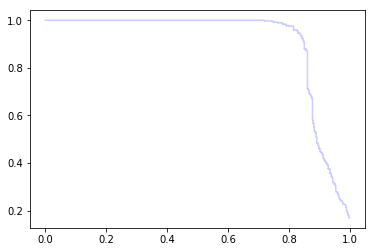

In [73]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')

In [ ]:
fpr, tpr, thresholds = [],[],[]
area_under_curve = []
my_models = []
for key in pred_probas:
    f,t,th = roc_curve(y, pred_probas[key][:,1], pos_label=True)
    my_models.append(key)
    area_under_curve.append(auc(f, t))
    fpr.append(f)
    tpr.append(t)
    thresholds.append(th)

In [7]:
df_train['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [9]:
df_train.groupby('State')['Churn'].value_counts()

State  Churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
       True     11
AZ     False    60
       True      4
CA     False    25
       True      9
CO     False    57
       True      9
CT     False    62
       True     12
DC     False    49
       True      5
DE     False    52
       True      9
FL     False    55
       True      8
GA     False    46
       True      8
HI     False    50
       True      3
IA     False    41
       True      3
ID     False    64
       True      9
IL     False    53
       True      5
                ..
OK     False    52
       True      9
OR     False    67
       True     11
PA     False    37
       True      8
RI     False    59
       True      6
SC     False    46
       True     14
SD     False    52
       True      8
TN     False    48
       True      5
TX     False    54
       True     18
UT     False    62
       True     10
VA     False    72
       True      5
VT     False    65